# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [ ]:
import random

class Basic_Agent ():
    def __init__(self, task):
        self.task = task
    
    def act (self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [ ]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 0., 0., 0., 0.])  # initial pose # [x, y, z, phi, theta, psi]
init_velocities = np.array([0., 0., 0.])         # initial velocities # x_velocity, y_velocity, z_velocity
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities # phi_velocity, theta_velocity, psi_velocity
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    
    # reset environment
    initial_state = task.reset ()
    print ('initial state: {} {} {}'.format (initial_state[:6], initial_state[6:12], initial_state[12:]))
    
    while True:
        rotor_speeds = agent.act()
        #rotor_speeds = [400, 400, 400, 400]
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation. Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axs = plt.subplots (1, 2)

axs[0].plot(results['time'], results['x'], label='x')
axs[0].plot(results['time'], results['y'], label='y')
axs[0].plot(results['time'], results['z'], label='z')
axs[0].legend(loc='upper left')
axs[0].set (title='position')

axs[1].plot(results['time'], results['phi'], label='phi')
axs[1].plot(results['time'], results['theta'], label='theta')
axs[1].plot(results['time'], results['psi'], label='psi')
axs[1].legend(loc='upper left')
axs[1].set (title='Euler angles')

_ = plt.ylim()
fig.set_size_inches ((14., 6.), forward=True)
plt.show()

The next code cell visualizes the velocity of the quadcopter. before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

In [ ]:
fig, axs = plt.subplots (1, 2)

axs[0].plot(results['time'], results['x_velocity'], label='x_hat')
axs[0].plot(results['time'], results['y_velocity'], label='y_hat')
axs[0].plot(results['time'], results['z_velocity'], label='z_hat')
axs[0].legend(loc='upper left')
axs[0].set (title='velocity')

axs[1].plot(results['time'], results['phi_velocity'], label='phi_velocity')
axs[1].plot(results['time'], results['theta_velocity'], label='theta_velocity')
axs[1].plot(results['time'], results['psi_velocity'], label='psi_velocity')
axs[1].legend(loc='upper left')
axs[1].set (title='velocity in Euler angles')

_ = plt.ylim()
fig.set_size_inches ((14., 6.), forward=True)
plt.show()

Finally, you can use the code cell below to print the agent's choice of actions.  

In [ ]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [ ]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [ ]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush ()

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

### My Environment
The environment is derived by the given class 'Task'.

In [1]:
from task import Task
import numpy as np

class MyTask (Task):
    
    
    def __init__ (self, init_pose, init_velocities, init_angle_velocities, runtime=5.):
        #Task.__init__ (self)
        super ().__init__ (init_pose, init_velocities, init_angle_velocities, runtime)
        
        # Goal
        self.target_pos = np.array ([0., 0., 10.])
        
        # other
        self.__old_v = self.sim.v
    
    
    # reward function (overwrite)
    def get_reward (self):
        # 20% time stayed 'alive'
        # 50% difference in position
        # 30% change of velocity per step
        reward = 0.20*(self.sim.time/self.sim.runtime) - \
            0.50*abs (self.sim.pose[2] - self.target_pos[2]) - \
            0.30*abs(self.sim.v[2]-self.__old_v[2])
        return reward
    
    # step function (overwrite)
    def step (self, rotor_speeds):
        self.__old_v = self.sim.v
        return (super ().step (rotor_speeds))

### My Agent
The agent is defined in <a href=".\agents\agent.py">agent.py</a>.

In [2]:
### Prepare environment
import os
import numpy as np
import random as rn
import tensorflow as tf
from keras import backend as K
# clear everything known of past instances ("useful to avoid clutter from old models / layers")
K.clear_session ()

# How can I obtain reproducible results using Keras during development?
# source: https://keras.io/getting-started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development
random_state = 42

# for certain hash-based operations
os.environ['PYTHONHASHSEED'] = '0'
# for starting Numpy generated random numbers in a well-defined initial state
np.random.seed (random_state)
# for starting core Python generated random numbers in a well-defined state
rn.seed (random_state)
# force TensorFlow to use single thread
session_conf = tf.ConfigProto (intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
# random number generation in the TensorFlow backend have a well-defined initial state
tf.set_random_seed (random_state)
sess = tf.Session (graph=tf.get_default_graph (), config=session_conf)
K.set_session (sess)

c:\program files\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
## Environmet
import random as rn

runtime = 20.
init_pose = np.array ([0., 0., 0., 0., 0., 0.])
init_velocities = np.array ([0., 0., 0.])
init_angle_velocities = np.array ([0., 0., 0.])

env = MyTask (init_pose, init_velocities, init_angle_velocities, runtime)

print ('original state size w/ action repeat:', env.state_size)
print ('original state size w/o \'action repeat\':', env.sim.pose.shape[0])
print ('example of a original sample:')
env.reset ()
rotor_speeds = np.zeros (4)
random_speed = rn.randint (0, 900)
for i in range (4):
    rotor_speeds[i] = random_speed
next_state, reward, done = env.step (rotor_speeds)
print (next_state, reward, done)
print (env.sim.v)
# new feature vector, consisting of <1, z, v_z, z*v_z>
print ('my sample feature vector: <1, z, v_z, z*v_z>')
state_vec = np.array ([1., next_state[2], env.sim.v[2], next_state[2] * env.sim.v[2]])
print (state_vec)

original state size w/ action repeat: 18
original state size w/o 'action repeat': 6
example of a original sample:
[0.         0.         0.00318131 0.         0.         0.
 0.         0.         0.01272409 0.         0.         0.
 0.         0.         0.02862411 0.         0.         0.        ] -14.976535243418478 False
[0.         0.         0.95385392]
my sample feature vector: <1, z, v_z, z*v_z>
[1.         0.00318131 0.95385392 0.0030345 ]


In [4]:
## TODO: Train your agent here.
from agents.agent import MLPQNAgent
# state size = 4, shape =(none, 4)
# action size = 13
in_shape = np.zeros (4)
agent = MLPQNAgent (in_shape.shape, 15, init_info=True)

rl hyperparameters:
 epsilon: max = 1.0, min = 0.01, decay = 5e-05
 gamma: value = 0.9
nn hyperparameters:
 learning rate: value = 0.001
nn architecture:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 4)                 0         
_________________________________________________________________
hidden_1 (Dense)             (None, 64)                320       
_________________________________________________________________
hidden_2 (Dense)             (None, 48)                3120      
_________________________________________________________________
hidden_3 (Dense)             (None, 48)                2352      
_________________________________________________________________
hidden_4 (Dense)             (None, 24)                1176      
_________________________________________________________________
output (Dense)               (None, 15)               

In [5]:
import numpy as np
import sys


batch_size = 200
train_episodes = 1000

labels = ['time', 'x', 'y', 'z', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

rewards_list = []
losses_list = []
results_list = []
loss = 0.
for ep in range (1, train_episodes+1):
    total_reward = 0.
    step = 0
    ep_loss = 0.
    #1 - setting initial rotor speeds on high value helped to get the agent learning
    rotor_speeds = np.full (4, (env.action_high - env.action_low)/2.)
    env.reset ()
    state, reward, done = env.step (rotor_speeds)
    state = np.array ([1., state[14], env.sim.v[2], state[14] * env.sim.v[2]])
    results = {x : [] for x in labels}
    while True:        
        # select action
        action = agent.select_action (np.reshape(state, [1, 4]))        
        if action == 1:
            rotor_speeds = (rotor_speeds-200)
        elif action == 8:
            rotor_speeds = (rotor_speeds+200)
        elif action == 2:
            rotor_speeds = (rotor_speeds-100)
        elif action == 9:
            rotor_speeds = (rotor_speeds+100)
        elif action == 3:
            rotor_speeds = (rotor_speeds-50)
        elif action == 10:
            rotor_speeds = (rotor_speeds+50)
        elif action == 4:
            rotor_speeds = (rotor_speeds-20)
        elif action == 11:
            rotor_speeds = (rotor_speeds+20)
        elif action == 5:
            rotor_speeds = (rotor_speeds-10)
        elif action == 12:
            rotor_speeds = (rotor_speeds+10)
        elif action == 6:
            rotor_speeds = (rotor_speeds-5)
        elif action == 13:
            rotor_speeds = (rotor_speeds+5)
        elif action == 7:
            rotor_speeds = (rotor_speeds-1)
        elif action == 14:
            rotor_speeds = (rotor_speeds+1)
        
        if (rotor_speeds < env.action_low).all ():
            rotor_speeds = np.full (4, env.action_low)
        if (rotor_speeds > env.action_high).all ():
            rotor_speeds = np.full (4, env.action_high)
        
        # Take action, get new state and reward
        next_state, reward, done = env.step (rotor_speeds)
        
        total_reward += reward
        
        to_write = [env.sim.time] + list(env.sim.pose) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        
        if done:
            # the episode ends so no next state
            next_state = np.zeros (state.shape)
            rewards_list.append ((ep, total_reward))
        else:
            next_state = np.array ([1., next_state[14], env.sim.v[2], next_state[14] * env.sim.v[2]])
            state = next_state
        
        # add experience to memory
        agent.store ((state, action, reward, next_state))
        
        loss = agent.learn (batch_size)
        losses_list.append (loss)
        
        step += 1
        ep_loss += loss
        if done:
            ep_loss /= (step*1.)
            print('episode: {:5d}'.format(ep),
                  'total reward: {:10.2f}'.format(total_reward),
                  'avg. training loss: {:10.4f}'.format(ep_loss),
                  'explore P: {:.5f}'.format(agent.explore_p))
            
            break
        
    results_list.append (results)

episode:     1 total reward:     -29.99 avg. training loss:     0.0000 explore P: 0.99000
episode:     2 total reward:    -148.49 avg. training loss:     0.0000 explore P: 0.99000
episode:     3 total reward:   -3111.49 avg. training loss:     0.0000 explore P: 0.99000


C:\Users\Daniel\OneDrive\projects\udacity.mlnd\mlnd\projects\RL-Quadcopter-2\physics_sim.py:114: RuntimeWarning: divide by zero encountered in double_scalars
  J = V / n * D


episode:     4 total reward:  -40063.45 avg. training loss:    43.6693 explore P: 0.99064
episode:     5 total reward:    -163.96 avg. training loss:  8310.9346 explore P: 0.99010
episode:     6 total reward:  -18886.33 avg. training loss:   161.7681 explore P: 0.97894
episode:     7 total reward:     -74.87 avg. training loss:   136.9950 explore P: 0.97870
episode:     8 total reward:    -363.29 avg. training loss:   103.4511 explore P: 0.97749
episode:     9 total reward:     -59.90 avg. training loss:   157.6302 explore P: 0.97730
episode:    10 total reward:  -73603.37 avg. training loss:    74.4485 explore P: 0.96213
episode:    11 total reward:    -208.11 avg. training loss:   179.8806 explore P: 0.96147
episode:    12 total reward:    -104.56 avg. training loss:    78.6643 explore P: 0.96113
episode:    13 total reward:   -1495.48 avg. training loss:   125.2793 explore P: 0.95639
>>> target estimator network updated (1000)
episode:    14 total reward:  -50272.84 avg. training lo

episode:    95 total reward:   -6543.90 avg. training loss:   387.4424 explore P: 0.71451
>>> target estimator network updated (7000)
episode:    96 total reward:  -45522.62 avg. training loss:   378.1848 explore P: 0.70597
episode:    97 total reward:   -1219.66 avg. training loss:   351.6574 explore P: 0.70291
episode:    98 total reward:     -29.99 avg. training loss:    16.7287 explore P: 0.70284
episode:    99 total reward:     -29.99 avg. training loss:  1171.4358 explore P: 0.70277
episode:   100 total reward:     -59.90 avg. training loss:   219.0483 explore P: 0.70264
episode:   101 total reward:    -192.49 avg. training loss:   153.3907 explore P: 0.70219
episode:   102 total reward:     -59.91 avg. training loss:   526.2268 explore P: 0.70205
episode:   103 total reward:   -3435.58 avg. training loss:   335.4877 explore P: 0.69715
episode:   104 total reward:     -59.89 avg. training loss:   302.5870 explore P: 0.69701
episode:   105 total reward:   -1608.03 avg. training lo

episode:   182 total reward:    -483.31 avg. training loss:    89.3895 explore P: 0.46891
episode:   183 total reward:    -134.33 avg. training loss:   315.5741 explore P: 0.46870
episode:   184 total reward:    -264.87 avg. training loss:    49.1654 explore P: 0.46829
episode:   185 total reward:    -454.91 avg. training loss:    87.8472 explore P: 0.46664
episode:   186 total reward:  -18464.50 avg. training loss:   132.6835 explore P: 0.46154
episode:   187 total reward:    -309.22 avg. training loss:    99.8893 explore P: 0.46106
episode:   188 total reward:     -89.53 avg. training loss:     9.6093 explore P: 0.46093
episode:   189 total reward:     -29.99 avg. training loss:     2.4897 explore P: 0.46088
episode:   190 total reward:     -29.99 avg. training loss:  1181.9857 explore P: 0.46084
episode:   191 total reward:    -193.17 avg. training loss:    30.3565 explore P: 0.46054
episode:   192 total reward:   -1077.49 avg. training loss:   219.3226 explore P: 0.45834
episode:  

episode:   273 total reward:     -59.88 avg. training loss:   396.5286 explore P: 0.39397
episode:   274 total reward:    -235.87 avg. training loss:   191.4509 explore P: 0.39366
episode:   275 total reward:    -450.00 avg. training loss:   146.7738 explore P: 0.39303
episode:   276 total reward:     -59.82 avg. training loss:   115.3594 explore P: 0.39295
>>> target estimator network updated (19000)
episode:   277 total reward:   -3666.42 avg. training loss:   109.7602 explore P: 0.39074
episode:   278 total reward:    -119.50 avg. training loss:    23.6663 explore P: 0.39058
episode:   279 total reward:   -2824.40 avg. training loss:    76.6652 explore P: 0.38878
episode:   280 total reward:     -29.99 avg. training loss:    32.5206 explore P: 0.38874
episode:   281 total reward:     -59.91 avg. training loss:   281.8889 explore P: 0.38867
episode:   282 total reward:     -74.84 avg. training loss:     7.4412 explore P: 0.38857
episode:   283 total reward:     -29.99 avg. training l

episode:   363 total reward:     -59.87 avg. training loss:     9.4697 explore P: 0.27983
>>> target estimator network updated (26000)
episode:   364 total reward:  -43782.34 avg. training loss:   116.8805 explore P: 0.27594
episode:   365 total reward:  -10982.35 avg. training loss:    50.0785 explore P: 0.27378
episode:   366 total reward:  -10405.38 avg. training loss:    60.0867 explore P: 0.27181
episode:   367 total reward:  -20213.47 avg. training loss:   104.3209 explore P: 0.26930
>>> target estimator network updated (27000)
episode:   368 total reward:  -13309.96 avg. training loss:   109.5894 explore P: 0.26639
episode:   369 total reward:  -13737.38 avg. training loss:   106.9653 explore P: 0.26444
episode:   370 total reward:   -3742.04 avg. training loss:    58.7764 explore P: 0.26292
episode:   371 total reward:     -29.98 avg. training loss:     3.0205 explore P: 0.26289
episode:   372 total reward:     -44.97 avg. training loss:    28.3607 explore P: 0.26285
episode:  

episode:   452 total reward:   -1193.02 avg. training loss:    40.8122 explore P: 0.19896
episode:   453 total reward:    -458.95 avg. training loss:    17.8909 explore P: 0.19829
episode:   454 total reward:    -391.75 avg. training loss:    44.2197 explore P: 0.19769
episode:   455 total reward:    -134.32 avg. training loss:    31.0293 explore P: 0.19761
episode:   456 total reward:   -2591.89 avg. training loss:    41.3636 explore P: 0.19671
episode:   457 total reward:  -25586.76 avg. training loss:    23.9412 explore P: 0.19457
episode:   458 total reward:    -436.91 avg. training loss:    44.6226 explore P: 0.19389
episode:   459 total reward:    -119.54 avg. training loss:    18.9677 explore P: 0.19382
episode:   460 total reward:    -305.82 avg. training loss:    22.8137 explore P: 0.19363
episode:   461 total reward:    -516.28 avg. training loss:    36.1714 explore P: 0.19309
episode:   462 total reward:     -29.99 avg. training loss:    19.0332 explore P: 0.19307
episode:  

episode:   543 total reward:     -29.98 avg. training loss:     5.3778 explore P: 0.15521
episode:   544 total reward:     -29.98 avg. training loss:     8.0511 explore P: 0.15520
episode:   545 total reward:    -452.12 avg. training loss:    31.0906 explore P: 0.15488
episode:   546 total reward:     -29.99 avg. training loss:     7.1364 explore P: 0.15487
episode:   547 total reward:    -320.61 avg. training loss:    41.5023 explore P: 0.15471
episode:   548 total reward:     -29.98 avg. training loss:     6.2045 explore P: 0.15469
episode:   549 total reward:    -104.63 avg. training loss:     3.1800 explore P: 0.15464
episode:   550 total reward:     -44.97 avg. training loss:    10.9811 explore P: 0.15462
episode:   551 total reward:     -29.98 avg. training loss:     2.5746 explore P: 0.15460
episode:   552 total reward:     -29.98 avg. training loss:   101.5098 explore P: 0.15459
episode:   553 total reward:     -44.97 avg. training loss:    69.7377 explore P: 0.15457
episode:  

episode:   644 total reward:     -29.98 avg. training loss:    96.7921 explore P: 0.14818
episode:   645 total reward:     -29.98 avg. training loss:     4.9587 explore P: 0.14817
episode:   646 total reward:     -29.98 avg. training loss:     3.9445 explore P: 0.14815
episode:   647 total reward:     -29.98 avg. training loss:     6.0076 explore P: 0.14814
episode:   648 total reward:     -29.98 avg. training loss:    31.3477 explore P: 0.14812
episode:   649 total reward:     -29.98 avg. training loss:   116.1124 explore P: 0.14811
episode:   650 total reward:     -29.98 avg. training loss:    12.7629 explore P: 0.14810
episode:   651 total reward:     -44.97 avg. training loss:     5.8592 explore P: 0.14808
episode:   652 total reward:    -162.87 avg. training loss:    34.8361 explore P: 0.14800
episode:   653 total reward:     -29.98 avg. training loss:     1.8563 explore P: 0.14799
episode:   654 total reward:     -29.98 avg. training loss:     1.7006 explore P: 0.14797
episode:  

episode:   752 total reward:     -29.98 avg. training loss:     5.3272 explore P: 0.14446
episode:   753 total reward:     -29.98 avg. training loss:     2.2305 explore P: 0.14444
episode:   754 total reward:     -44.96 avg. training loss:     1.9647 explore P: 0.14442
episode:   755 total reward:     -29.98 avg. training loss:     7.4377 explore P: 0.14441
episode:   756 total reward:     -59.86 avg. training loss:     3.7254 explore P: 0.14438
episode:   757 total reward:     -29.98 avg. training loss:     1.7979 explore P: 0.14437
episode:   758 total reward:     -44.97 avg. training loss:     6.0407 explore P: 0.14435
episode:   759 total reward:     -29.98 avg. training loss:     1.4323 explore P: 0.14434
episode:   760 total reward:     -29.98 avg. training loss:     1.4078 explore P: 0.14432
episode:   761 total reward:    -119.24 avg. training loss:    11.4315 explore P: 0.14427
episode:   762 total reward:     -29.98 avg. training loss:    17.5475 explore P: 0.14426
episode:  

episode:   856 total reward:     -74.82 avg. training loss:    12.9744 explore P: 0.14074
episode:   857 total reward:     -29.98 avg. training loss:     1.7495 explore P: 0.14073
episode:   858 total reward:     -29.98 avg. training loss:     1.1549 explore P: 0.14071
episode:   859 total reward:     -59.86 avg. training loss:   123.5940 explore P: 0.14069
episode:   860 total reward:     -29.98 avg. training loss:   162.3439 explore P: 0.14067
episode:   861 total reward:     -44.97 avg. training loss:     2.7402 explore P: 0.14065
episode:   862 total reward:     -29.98 avg. training loss:     5.8474 explore P: 0.14064
episode:   863 total reward:     -29.98 avg. training loss:     4.0900 explore P: 0.14063
episode:   864 total reward:     -29.98 avg. training loss:     5.5353 explore P: 0.14062
episode:   865 total reward:     -59.90 avg. training loss:    12.4628 explore P: 0.14059
episode:   866 total reward:     -29.98 avg. training loss:     1.8363 explore P: 0.14058
episode:  

episode:   948 total reward:   -1157.60 avg. training loss:    27.9630 explore P: 0.13863
>>> target estimator network updated (41000)
episode:   949 total reward:  -46287.23 avg. training loss:    24.6039 explore P: 0.13695
episode:   950 total reward:     -29.98 avg. training loss:     6.6043 explore P: 0.13694
episode:   951 total reward:     -29.98 avg. training loss:   131.9847 explore P: 0.13693
episode:   952 total reward:     -29.98 avg. training loss:     9.4440 explore P: 0.13691
episode:   953 total reward:     -44.97 avg. training loss:    11.9916 explore P: 0.13689
episode:   954 total reward:     -29.98 avg. training loss:     5.1918 explore P: 0.13688
episode:   955 total reward:     -29.98 avg. training loss:    53.7917 explore P: 0.13687
episode:   956 total reward:     -29.98 avg. training loss:    84.4515 explore P: 0.13686
episode:   957 total reward:     -29.98 avg. training loss:     3.7259 explore P: 0.13684
episode:   958 total reward:     -29.98 avg. training l

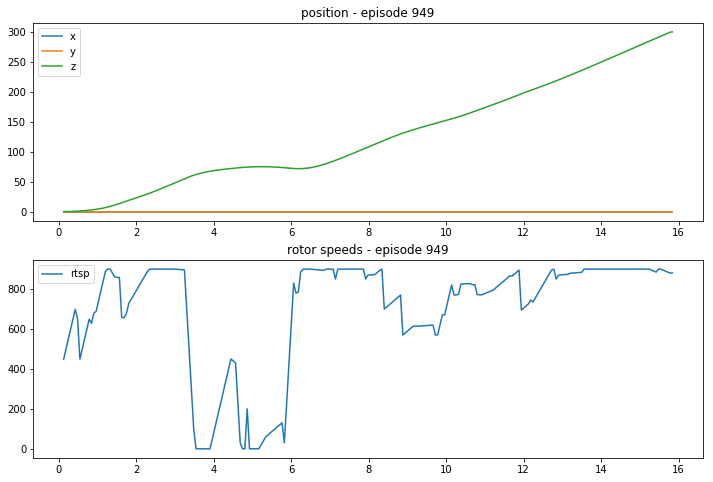

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

ep_begin = 949

fig, axs = plt.subplots (2, 1)


axs[0].plot(results_list[(ep_begin-1)]['time'], results_list[(ep_begin-1)]['x'], label='x')
axs[0].plot(results_list[(ep_begin-1)]['time'], results_list[(ep_begin-1)]['y'], label='y')
axs[0].plot(results_list[(ep_begin-1)]['time'], results_list[(ep_begin-1)]['z'], label='z')
axs[0].legend(loc='upper left')
axs[0].set (title='position - episode {}'.format (ep_begin))

axs[1].plot(results_list[(ep_begin-1)]['time'], results_list[(ep_begin-1)]['rotor_speed4'], label='rtsp')
axs[1].legend(loc='upper left')
axs[1].set (title='rotor speeds - episode {}'.format (ep_begin))

_ = plt.ylim()
fig.set_size_inches ((12., 8.), forward=True)
plt.show()

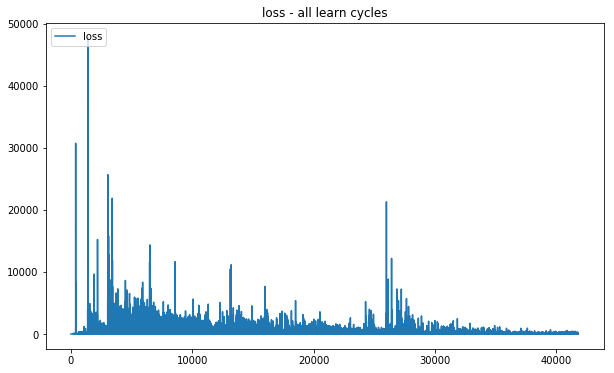

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axs = plt.subplots ()

axs.plot(list (range (0, len (losses_list))), losses_list, label='loss')
axs.legend(loc='upper left')
axs.set (title='loss - all learn cycles')

_ = plt.ylim()
fig.set_size_inches ((10., 6.), forward=True)
plt.show()

In [12]:
print (rotor_speeds)
print (env.sim.pose)
print (env.target_pos)
print(env.sim.v)
print(env.sim.angular_v)

[250. 250. 250. 250.]
[0. 0. 0. 0. 0. 0.]
[ 0.  0. 10.]
[ 0.          0.         -0.36801508]
[0. 0. 0.]


## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

Text(0,0.5,'Total Reward')

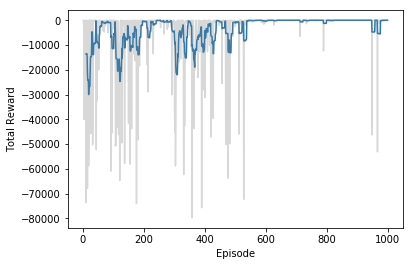

In [13]:
## TODO: Plot the rewards.
%matplotlib inline
import matplotlib.pyplot as plt

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / N

eps, rews = np.array(rewards_list).T
smoothed_rews = running_mean(rews, 10)
plt.plot(eps[-len(smoothed_rews):], smoothed_rews)
plt.plot(eps, rews, color='grey', alpha=0.3)
plt.xlabel('Episode')
plt.ylabel('Total Reward')

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

The task in my <a href='#My-Environment'>environment</a> is to reach a target position of [x,y,z]=[0,0,10]. The initial values for the quadcopter's position, velocity and angles are always 0.

Therefor the quadcopter's rotors all get the same speed from the agent, to ensure movement up and down only.

The reward function consists of three values:
- flying time: the longer the higher rewarded (contributes 20% to total reward)
  - reason: the agent shall learn to stay as long as possible in an episode
- distance to target position: the closer, the higher rewarded (contributes 50% to total reward)
  - reason: since it is the goal in the given environment
- change in velocity: the higher the change, the lower rewarded (contributes 30% of total reward)
  - reason: after many trials I found out, that the position belonging to a given rotor speed is delayed (see picture below) and therefor I tried to smooth the actions and penalize high changes in velocity

<img src='.\stuff\delay-act-pos.png' width=50% align=left />

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

### Choice of learning algorithm

First I examined the environment with help of the definition of a Markov Decision Process:

In general a MDP consits of
- a Model (defined by transitions T)
- a finite State space S
- a finite Action space A
- Rewards R

RL algorithms can be divided into
- model-based, algorithms need: T and R
- value-based, model-free, algorithms need: Q
- policy-based

Basically, all RL algorithms work well with discrete spaces (States, Actions)

The quadcopter environment has the following:
##### State space S
Currently, every state holds the 6 degrees of freedom
- 3 translational, position (x, y, z) and
- 3 rotational, Euler angles ($\varphi, \vartheta, \psi$)

The state space is large and values are continuous, but has boundaries given by the physics simulation. Exceeding the boundaries or exceeding the runtime leads to termination of the episode. By that the task is episodic.

Furthermore, we need to use function approximation to enable the agent to choose correct actions and minimize the computation time.

Action repeats are used, [...] in order to make the problems approximately fully observable in the high dimensional environment [...]. For each timestep of the agent, we step the simulation 3 timesteps, repeating the agent’s action and rendering each time (arXiv:1509.02971, p. 5).

In [14]:
# State space S
task = Task ()

print ('Size of a state (3 action repeats * 6 dof):', task.state_size)

print ('S lower boundary', task.sim.lower_bounds)
print ('S upper boundary', task.sim.upper_bounds)

Size of a state (3 action repeats * 6 dof): 18
S lower boundary [-150. -150.    0.]
S upper boundary [150. 150. 300.]


##### Action space A
One action consits of 4 independent values, representing the thrust / rotor speeds.

The action space values are continuous.

In [15]:
print ('Size of an action:', task.action_size)
print ('A boundaries:', (task.action_low, task.action_high))

Size of an action: 4
A boundaries: (0, 900)


##### Reward function R
The base reward function given by class Task is
- R = 1 if target positon reached
- else: R = 1 - 30% of absolute difference between actual positon and target position

Thus, the reward will be a high negative scalar, if the quadcopter is far away from the target position

The reward function was changed to better overcome the own defined goal

Quadcopter has 4 motors
<pre>
       front
     (1)   (2)
        \ /
right    o     right
        / \
     (3)   (4)
        rear
</pre>
Motors (1) and (4) rotate in dir1, Motors (2) and (3) rotate in dir2

- pitch +: increase speed of (3) and (4)
- pitch -: increase speed of (1) and (2)
- roll +: increase speed of (1) and (3)
- roll -: increase speed of (2) and (4)
- yaw +: increase speed of (2) and (3)
- yaw -: increase speed of (1) and (4)

#### Approach
With above information, I chose the following approach:
- continuous S: function approximation via neural network
- continuous A -> is going to be discretized in (+-200, +-100, +-50, +-20, +-10, +-5, +-1)
- Q-Learning
  - off-policy method: better overcomes exploration-exploitation dilemma
  - supports batch learning (for experience replay)
- experience replay, to decouple agent-environment activities from agent-learn activities
- additional Q Target network

### Architecture of the agent
The generalized architecture was built upon the post of <a href='https://jaromiru.com/2016/10/03/lets-make-a-dqn-implementation/'>jaromiru</a>, who specified the agent with a brain and a memory acting in an environment.

<img src='.\stuff\dqn.png' width=70% align=left>

The Agent consist of 2 Brains: one MLP (see architecture below) and one Taget Estimator network (Q Target).

Furthermore the Agent has a Memory to hold the last 20000 samples of the environment it is interacting with.

The architecture of the Brain and the Agent's hyperparameter:

<img src='.\stuff\agent_architecture.png' width=60% align=left>

The neural network is a standard MLP with:
- input layer with tensor = (,4) (see below why 4-dimensional)
- ouput layer with tensor = (,15) and linear activation
- 4 hidden layer with activation ReLU
- last hidden layer contains an L2 regularizer with $\lambda$=0.07

The target estimator will be updated every 1000 learn cycles. The source weights (the Brain itself) will be accounted with 12.5% ($\tau$=0.125)

discount rate: $\gamma$ = 0.9 - since the Agent shall be more farsighted in its judgements

learning rate: $\alpha$ = 0.001 - shorter gradient descent steps worked better, but learning was slower

exploration rate: $\epsilon§ begins at 1.0, is minimum 0.01 and decays exponential with 5e-5

#### feature vector x(s)
Why is the input layer 4-dimensional?

I used an approach of Sutton's book "Reinforcement Learning: An Introduction". As of section 9.5 Feature Construction for Linear Methods, one way to build the feature vector is with polynomials, to *"[...] take into account any interactions between these dimensions."* (p. 170).

This is why my input tensor consists of:
- 1.0 (*"[...] allows the representation of aﬃne functions in the original state numbers [...]"* (p. 170))
- position z on z axis
- velocity v_z in z axis
- product z * v_z

In fact, this helped the Brain to learn better (compared to original 3 positions x,y,z).

#### batch size
The batch size for each learn cycle is 300. Higher batch sizes seemed to work better.

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

To teach an agent this task is hard to me, since the results show somehow no learning progress.
The first 200 episodes the agent learned something, but then suddenly all episodes ended within a part of a second and I couldn't find out why. There is no proof detectable, that the episode ended due to being too high or too low - this is strange to me. (By the way: I had the same issue in the DQN section with cartpole mini project, but I think this was related to the Memory size)

Even with <a href='https://keras.io/getting-started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development'> preparing the environment as given by Keras documentation</a> I was not able to find out the reasons.

The rewards as printed above can't be evaluated in this case. Yes, there is an increase in the rewards over progressing episodes, but this increase comes from the sudden episode endings.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

The whole project was challenging in many ways:
- How does the environment work? - I need to know what the system is doing, where boundaries are, what states and actions I can take
- How shall I shape the reward function w.r.t. the goal of the task? - By far the hardest part, since without good knowledge about the behavior of the system, wrong rewarding leads to wrong learning
- What kind of learning algorithm shall I take? - It takes a while to figure out what RL algorithm works best
- How do I verify, that the agent is learning? - Look at rewards or at loss function of the MLP?

In fact I tried many many hours (better say weeks) to figure out how the agent shall learn the given task and it still excites me. It is an evolutional process for me solving the task. But on the other hand I got demotivated since progress was slow compared to time given solving this project. Nevertheless I feel confident to solve it one day.